In [4]:
using BoundaryValueDiffEq

In [ ]:
function f!(du, u, p, t)
    du[1] = u[2]
    du[2] = u[1]
end
function bc!(res, u, p, t)
    res[1] = u(0.0)[1] - 1
    res[2] = u(1.0)[1]
end
tspan = (0.0, 1.0)
u0 = [0.0, 0.0]
prob = BVProblem(f!, bc!, u0, tspan)
sol = solve(prob, MIRK4(), dt=0.01);

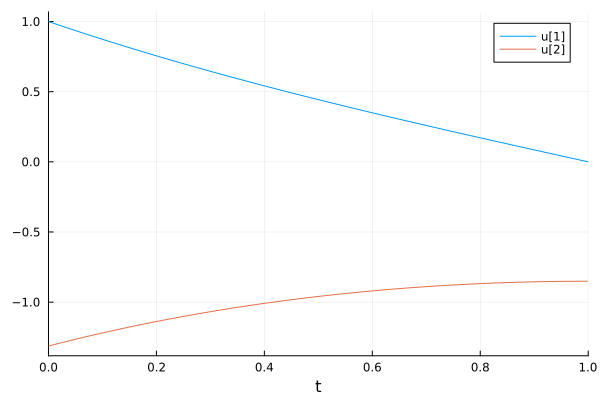

In [4]:
using Plots
plot(sol)

In [ ]:
# now let's solve the same problem with ModelingToolkit!
# we will need to model it as a dynamic optimization problem 

We want to solve the following ODE:
$$
y''(t) = y(t), \quad t \in [0, 1]
$$

subject to: 
$$y(0) = 1, \quad y(1) = 0$$

In [5]:
using ModelingToolkit, Plots
t = ModelingToolkit.t_nounits
D = ModelingToolkit.D_nounits;

In [6]:
@variables begin
    y(..)
end

eqs = [D(D(y(t))) ~ y(t)]

(ti, tf) = (0.0, 1.0)
cons = [y(ti) ~ 1.0, y(tf) ~ 0.0]

@named bvpsys = System(eqs, t; constraints=cons)
bvpsys = mtkcompile(bvpsys)

Model bvpsys:
Equations (2):
  2 standard: see equations(bvpsys)
Unknowns (2): see unknowns(bvpsys)
  y(t)
  yˍt(t)

In [7]:
u0 = [1.0, 0.1]
prob = BVProblem(bvpsys, u0, (ti, tf))

┌ Warning: The BVProblem is overdetermined. The total number of conditions (# constraints + # fixed initial values given by op) exceeds the total number of states. The BVP solvers will default to doing a nonlinear least-squares optimization.
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/b28X4/src/problems/bvproblem.jl:31


BVProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 1.0)
u0: 2-element Vector{Float64}:
 1.0
 0.1

In [8]:
sol = solve(prob, MIRK4(), dt=0.1)

retcode: Success
Interpolation: MIRK Order 4 Interpolation
t: 11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0
u: 11-element Vector{Vector{Float64}}:
 [0.9999999999999999, 0.09999999999999977]
 [1.015020840269085, 0.20066715271952085]
 [1.0402003474419843, 0.30334264919134757]
 [1.0757905264195076, 0.40905410000874076]
 [1.1221475755760484, 0.518859500608019]
 [1.179735451711647, 0.6338578200395439]
 [1.2491305134862933, 0.7551999998162935]
 [1.3310272898095135, 0.8841004729201638]
 [1.4262454309172017, 1.0218493182520567]
 [1.535737911704392, 1.169825172171537]
 [1.6606005694156623, 1.3295090263490585]

In [ ]:
plot(sol)

: 